<a href="https://colab.research.google.com/github/Jakom001/Learning-Data-Science/blob/main/Titanic_dataset_improvised_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
1. Exploratory Data Analysis
2. Data pre-processing
3. Building the model
4. Evaluating the performance of the model



Loading Libraries

In [1]:
import numpy as np
import pandas as pd

Loading Data

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

Understand the dataset

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Number os passengers who suvived: ",len(titanic[titanic['Survived'] == 1]))

Number os passengers who suvived:  342


In [5]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
print("percentage of those who survived: {}%".format(round(len(titanic[titanic['Survived'] == 1])/  len(titanic), 2)*100))

percentage of those who survived: 38.0%


In [9]:
len(titanic[(titanic['Survived'] == 1) & (titanic['Embarked'] == 'S')])

217

In [11]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Exploratory Data Analysis (EDA)

In [27]:
print("Percentage of men who survived", 100 * np.mean(titanic['Survived'] [titanic['Sex'] == 'male']))
print("Percentage of female who survived", 100 * np.mean(titanic['Survived'] [titanic['Sex'] == 'female']))

Percentage of men who survived 18.890814558058924
Percentage of female who survived 74.20382165605095


In [28]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [29]:
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passengers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in third class 24.236252545824847


Data Processing

Non numeric features to numeric.

categorical: "female" or "male". tcan be fixed by encoding this feature: "male" = 1, "female" = 0

In [30]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Missing Values

In [31]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [34]:
# looking at the frequency of each values in "Embarked"
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [36]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [37]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

omit irrelevant columns

In [38]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

Separating input and target variable

In [39]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

Train test split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Building  a model.
We will use decision tree classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Define the mode
titanic_model = DecisionTreeClassifier()

#Fit the model
titanic_model.fit(X_train, y_train)

DecisionTreeClassifier()

Predict the model

In [42]:
y_pred = titanic_model.predict(X_test)

Evaluate the model

In [44]:
from sklearn.metrics import accuracy_score

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, titanic_model.predict(X_train)))

Test Accuracy:  0.7491525423728813
Train Accuracy:  0.9798657718120806


Visualize the decision tree

!pip install graphviz

In [46]:
from sklearn.tree import  export_graphviz
import graphviz

In [48]:
dot_data= export_graphviz(titanic_model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

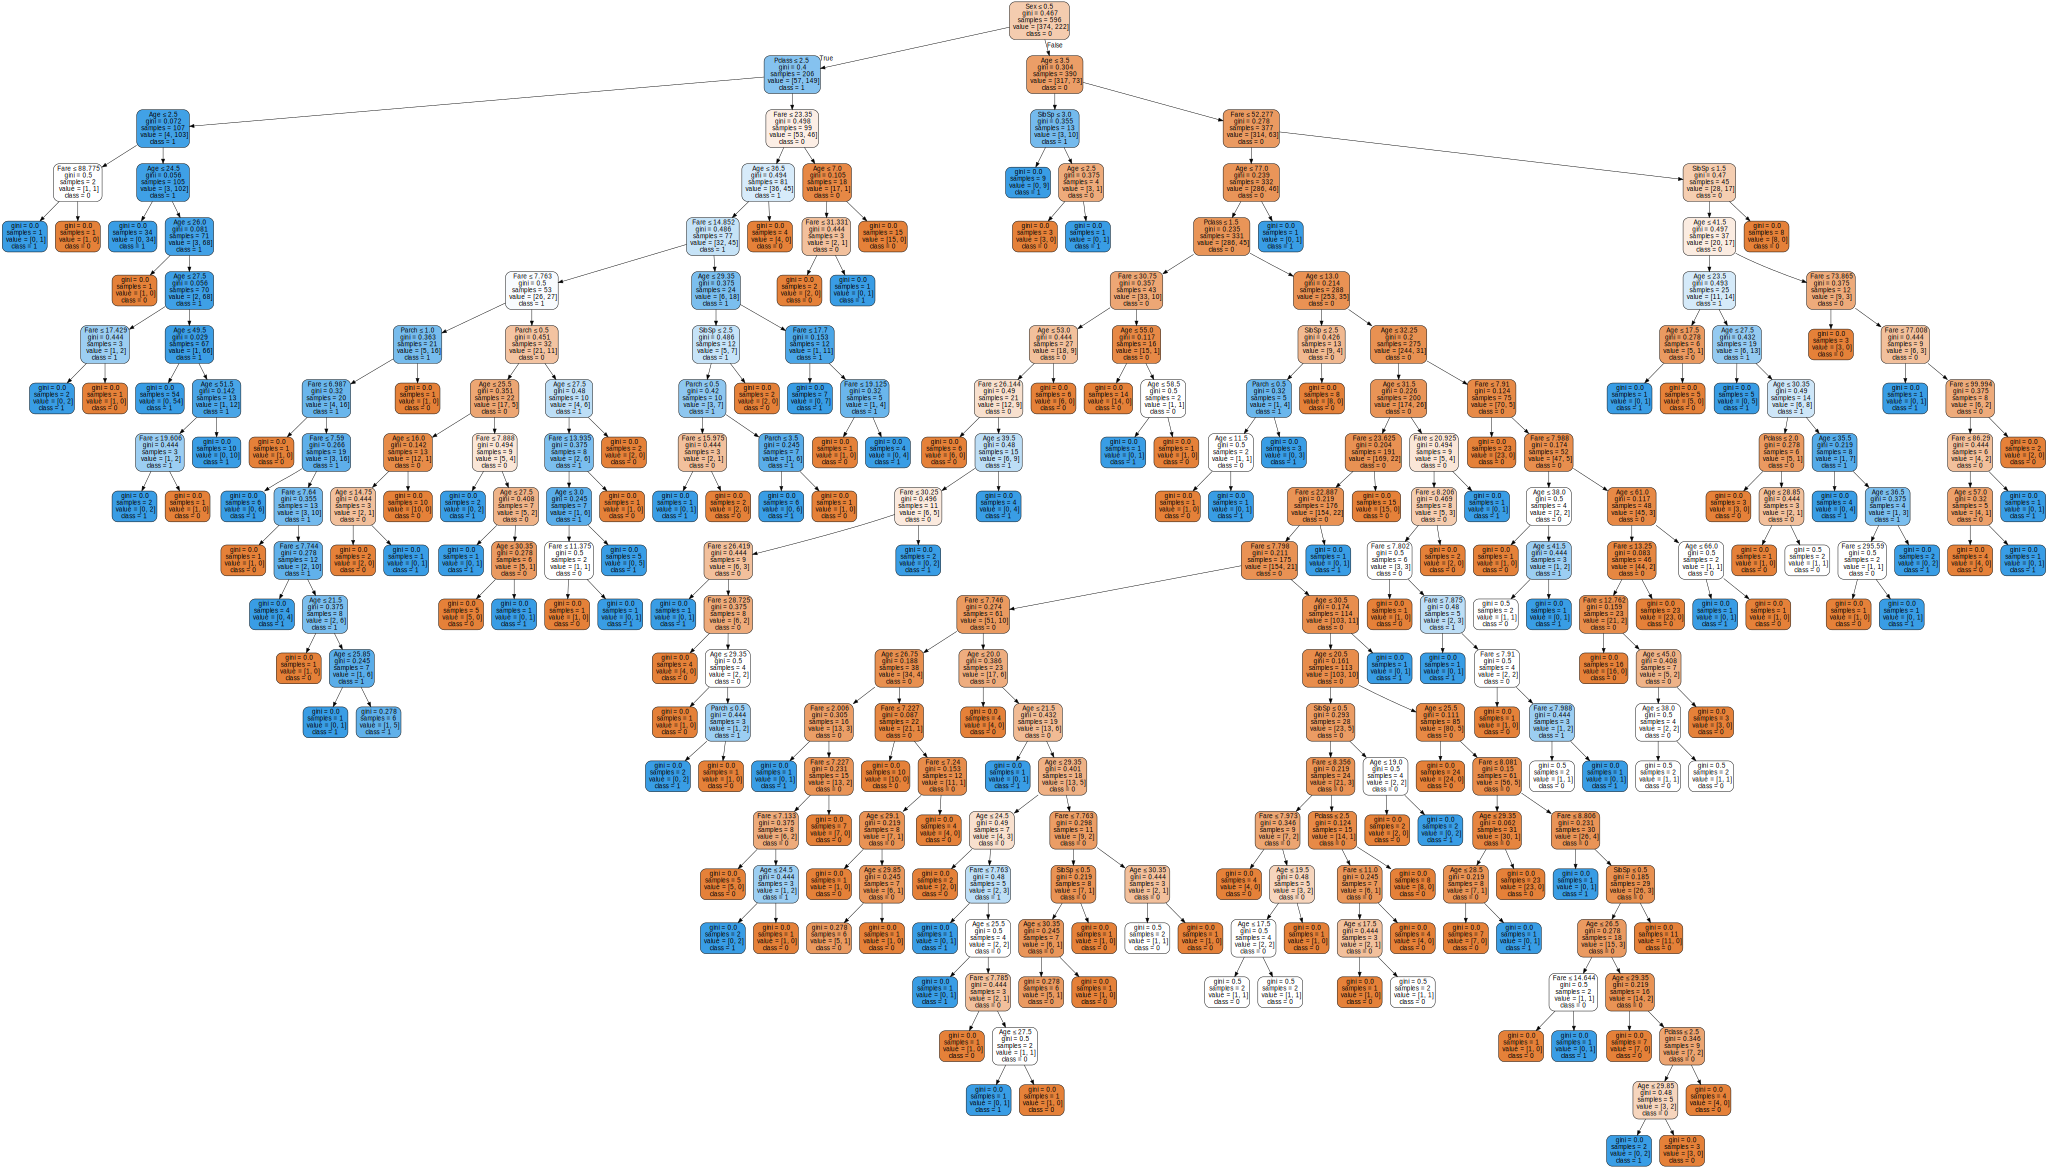

In [50]:
graph1=graphviz.Source(dot_data)
graph1

Imporove the model

By limiting the depth of the tree we can imporove the model, this limit the number of questions

In [51]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


In [53]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


In [54]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_improved, X_train, y_train, cv=10, scoring='accuracy')
print('Avarage train score...' , cv_score.mean())
print('Std train score...' , cv_score.std())

Avarage train score... 0.8171751412429378
Std train score... 0.07624102772646354


In [55]:
cv_score

array([0.66666667, 0.83333333, 0.91666667, 0.91666667, 0.76666667,
       0.76666667, 0.83050847, 0.84745763, 0.74576271, 0.88135593])

In [57]:
from sklearn.model_selection import cross_val_score
for depth in range(2, 6):
  print('With depth:',depth)
  cv_score = cross_val_score(DecisionTreeClassifier(max_depth = depth, max_features = None),
  X_train, y_train, cv=10, scoring='accuracy')
  print(' Avarage train score...' , cv_score.mean())
  print(' Std train score...' , cv_score.std())

With depth: 2
 Avarage train score... 0.8036158192090396
 Std train score... 0.0533085801506073
With depth: 3
 Avarage train score... 0.8171751412429378
 Std train score... 0.07624102772646354
With depth: 4
 Avarage train score... 0.7920338983050847
 Std train score... 0.0605554845423746
With depth: 5
 Avarage train score... 0.7986723163841808
 Std train score... 0.05842488813873271


In [58]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)

In [59]:
graph2=graphviz.Source(dot_data)

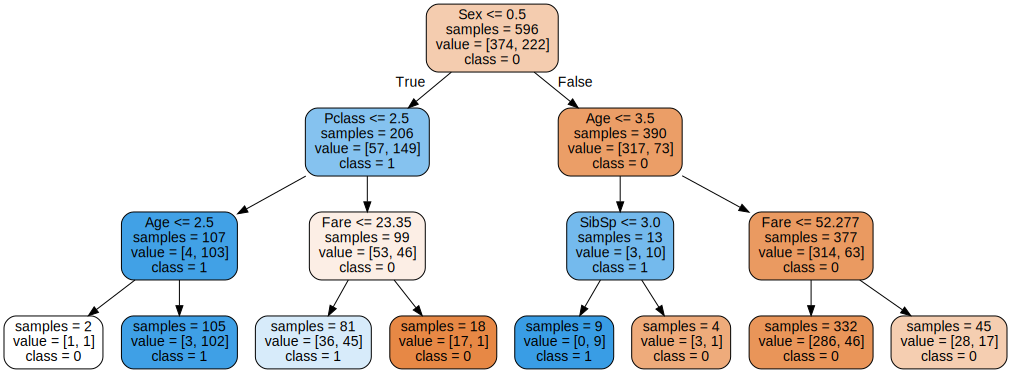

In [60]:
graph2

Optimisation


GridSearchCV with Decision Tree Classifier

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[i for i in range(2, 6)],
'criterion':['gini', 'entropy'],
'max_features':['auto', 'sqrt', 'log2', None]}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='accuracy', verbose=2)

In [62]:
print('Best Hyperparameters:', clf.best_params_)
print('Score:', clf.best_score_)
print('train score...' , accuracy_score(y_train, clf.predict(X_train)))
print('test score...', accuracy_score(y_test, clf.predict(X_test)))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
Score: 0.8188418079096044
train score... 0.8238255033557047
test score... 0.8203389830508474
